In [1]:
#importing python libraries
import warnings
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
os.chdir("C:\\Users\\Asus\\Documents\\Uni\\DEMD\\Project")
df=pd.read_csv("wk3_kc_house_train_data.csv")
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1116,2206700295,20140915T000000,453000.0,3,1.00,1210,9473,1.0,0,0,...,7,1210,0,1955,0,98006,47.5637,-122.139,1700,11465
5431,6403500570,20140612T000000,498500.0,5,2.75,2990,7420,2.0,0,0,...,8,2990,0,1996,0,98059,47.4944,-122.162,2290,7678
7127,4320200020,20140922T000000,715000.0,4,3.00,1986,6000,2.0,0,2,...,8,1746,240,1922,0,98136,47.5374,-122.390,1930,6200
6373,2301400540,20141215T000000,734000.0,4,2.25,2530,5000,1.5,0,0,...,7,1690,840,1925,0,98117,47.6806,-122.360,1530,5000
3635,7812801115,20140613T000000,153000.0,3,1.00,1270,6405,1.5,0,0,...,6,1270,0,1944,0,98178,47.4959,-122.241,1110,6405


In [6]:
df['date']=pd.to_datetime(df['date']) #as the time is in object format we convert it to date format


In [7]:
df.skew() #checking skewness

id                0.235447
price             4.298062
bedrooms          3.459849
bathrooms         0.557878
sqft_living       1.425826
sqft_lot         13.603880
floors            0.596603
waterfront       10.774077
view              3.285565
condition         1.034191
grade             0.767514
sqft_above        1.452748
sqft_basement     1.470083
yr_built         -0.462591
yr_renovated      4.498951
zipcode           0.414159
lat              -0.478866
long              0.876695
sqft_living15     1.102833
sqft_lot15        7.755503
dtype: float64

In [9]:
df.shape #checking shape

(9761, 21)

In [10]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9761 non-null   int64         
 1   date           9761 non-null   datetime64[ns]
 2   price          9761 non-null   float64       
 3   bedrooms       9761 non-null   int64         
 4   bathrooms      9761 non-null   float64       
 5   sqft_living    9761 non-null   int64         
 6   sqft_lot       9761 non-null   int64         
 7   floors         9761 non-null   float64       
 8   waterfront     9761 non-null   int64         
 9   view           9761 non-null   int64         
 10  condition      9761 non-null   int64         
 11  grade          9761 non-null   int64         
 12  sqft_above     9761 non-null   int64         
 13  sqft_basement  9761 non-null   int64         
 14  yr_built       9761 non-null   int64         
 15  yr_renovated   9761 n

In [11]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)    #for displaying the data in float format

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9761.00000,4605288287.66919,2876044376.02698,1200019.00000,2126049290.00000,3905040800.00000,7338402850.00000,9900000190.00000
price,9761.00000,542734.95164,379527.63854,80000.00000,320000.00000,450000.00000,649000.00000,7700000.00000
bedrooms,9761.00000,3.37588,0.96070,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,9761.00000,2.11718,0.77397,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,9761.00000,2086.73415,927.19430,290.00000,1420.00000,1910.00000,2570.00000,12050.00000
sqft_lot,9761.00000,15215.26063,41266.73460,520.00000,5100.00000,7642.00000,10660.00000,1651359.00000
floors,9761.00000,1.48607,0.53232,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,9761.00000,0.00840,0.09127,0.00000,0.00000,0.00000,0.00000,1.00000
view,9761.00000,0.24803,0.78788,0.00000,0.00000,0.00000,0.00000,4.00000
condition,9761.00000,3.41553,0.65055,1.00000,3.00000,3.00000,4.00000,5.00000


In [13]:
#looking at target variable
df['price'].describe()

count      9761.00000
mean     542734.95164
std      379527.63854
min       80000.00000
25%      320000.00000
50%      450000.00000
75%      649000.00000
max     7700000.00000
Name: price, dtype: float64

In [14]:
print('Skewness:%f' % df.price.skew()) #checking skewness of price

Skewness:4.298062


<AxesSubplot:>

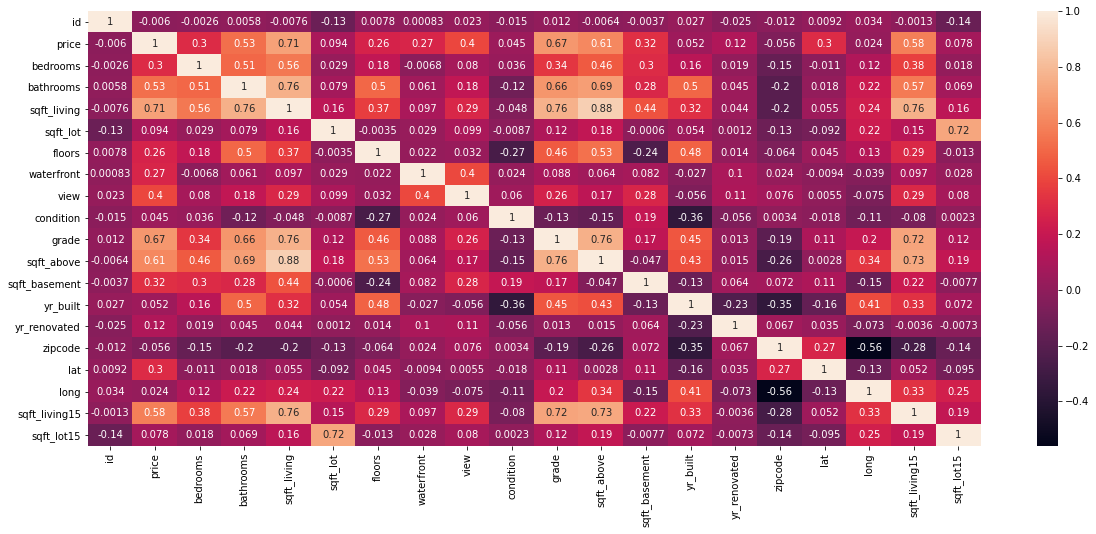

In [15]:
f, ax = plt.subplots(figsize=(20,8)) #finding the coreleation between predictors and target
sns.heatmap(df.corr(),annot=True) #creating confusion matrix

In [16]:
x=df[['bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'lat',
 'sqft_living15']]
x1=df[['bathrooms','sqft_living15','sqft_living','grade','sqft_above','bedrooms','sqft_basement','lat']]
y=df[['price']]
from sklearn.tree import DecisionTreeRegressor 

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [23]:
x_train=df.drop(['price','date','id'],axis='columns')
y_train=df['price']

In [24]:
scores=cross_val_score(DecisionTreeRegressor(random_state = 0),x_train,y_train,cv=10) 
scores.mean()

0.7241411414616852

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(DecisionTreeRegressor(),{'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13]},cv=10,n_iter=10)
rs.fit(x,y)
pd.DataFrame(rs.cv_results_)[['param_max_depth','param_min_samples_split','param_min_samples_leaf','mean_test_score']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,7,5,3,0.70720
1,4,9,7,0.61486
2,8,5,4,0.71005
3,10,4,2,0.73021
4,6,10,2,0.67914
5,7,7,10,0.70366
6,1,10,1,0.28557
7,9,12,13,0.72990
8,2,9,10,0.47125
9,6,10,5,0.64216


In [26]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=12, max_depth=10) 
  
# fit the regressor with X and Y data
reg=regressor.fit(x, y)
y_pred=reg.predict(x)
reg.score(x, y)

0.8264311201313922

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(DecisionTreeRegressor(),{'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13]},cv=10,n_iter=10)
rs.fit(x_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_max_depth','param_min_samples_split','param_min_samples_leaf','mean_test_score']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,1,1,11,NaN
1,10,6,1,0.75870
2,7,2,13,0.72840
3,1,3,11,0.28557
4,1,7,11,0.28557
5,6,1,1,NaN
6,5,12,8,0.68944
7,12,13,5,0.75601
8,7,4,3,0.73833
9,3,8,9,0.56860


In [28]:
rs.best_score_

0.7586957887285801

In [29]:
rs.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}